# Predict London Weather by LSTM ML

In [1]:
import pandas as pd   
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

Statistic Data

In [2]:
df = pd.read_csv("london_weather.csv")
sample_stats = df.describe(include = "all")
sample_info = df.info()
df.head()
sample_stats
print("The strength of data: ", len(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB
The strength of data:  15341


Handle missing data

In [3]:
missing_count = df.isnull().sum()
missing_percent = (missing_count/len(df)) * 100
missing_data_summary = pd.DataFrame({
    "Missing Count": missing_count,
    "Missing Percent (%)" : missing_percent.round(2)
})
print('Data missing: ')
missing_data_summary

Data missing: 


Missing Count  Missing Percent (%)
date                          0                 0.00
cloud_cover                  19                 0.12
sunshine                      0                 0.00
global_radiation             19                 0.12
max_temp                      6                 0.04
mean_temp                    36                 0.23
min_temp                      2                 0.01
precipitation                 6                 0.04
pressure                      4                 0.03
snow_depth                 1441                 9.39

In [4]:
df["cloud_cover"]=df["cloud_cover"].fillna(df["cloud_cover"].mean())
df["global_radiation"]=df["global_radiation"].fillna(df["global_radiation"].mean())
df["max_temp"]=df["max_temp"].fillna(df["max_temp"].mean())
df["mean_temp"]=df["mean_temp"].fillna(df["mean_temp"].mean())
df["min_temp"]=df["min_temp"].fillna(df["min_temp"].mean())
df["precipitation"]=df["precipitation"].fillna(df["precipitation"].mean())
df["snow_depth"]=df["snow_depth"].fillna(df["snow_depth"].mean())
df["pressure"]=df["pressure"].fillna(df["pressure"].mean())

In [5]:
print("Data after handle:")
missing_data_summary

Data after handle:


Missing Count  Missing Percent (%)
date                          0                 0.00
cloud_cover                  19                 0.12
sunshine                      0                 0.00
global_radiation             19                 0.12
max_temp                      6                 0.04
mean_temp                    36                 0.23
min_temp                      2                 0.01
precipitation                 6                 0.04
pressure                      4                 0.03
snow_depth                 1441                 9.39

Visualize average temp

<function matplotlib.pyplot.show(close=None, block=None)>

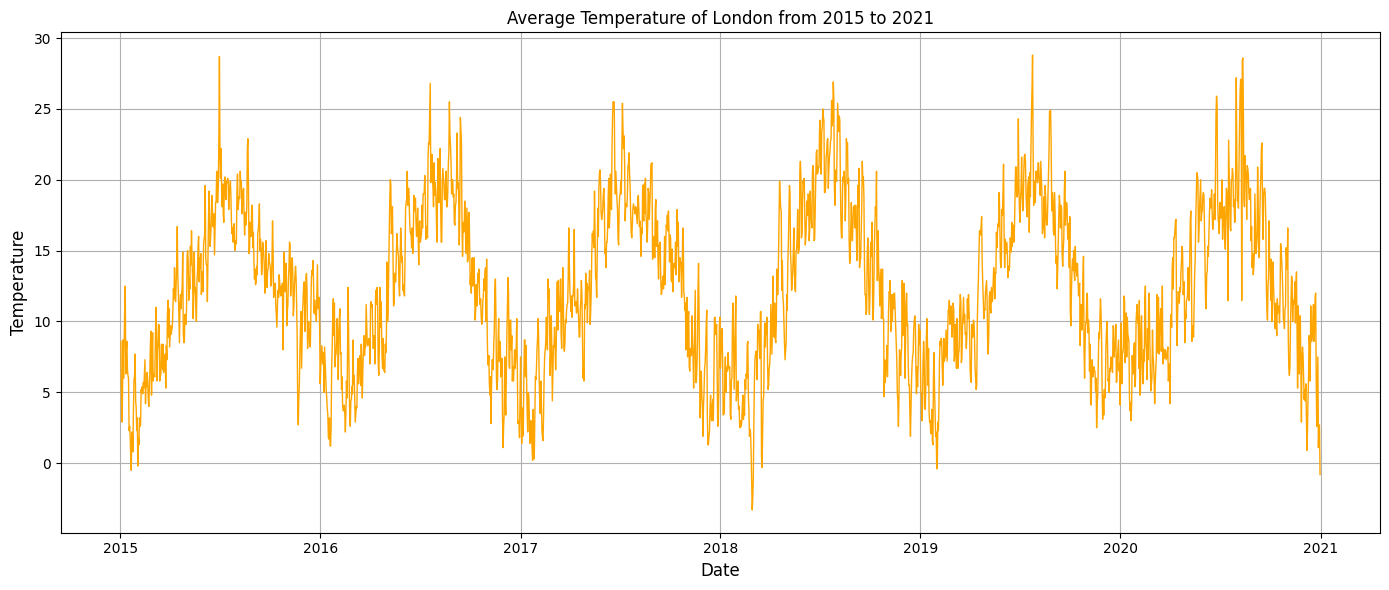

In [6]:
df['date'] = pd.to_datetime(df['date'], format = '%Y%m%d')
mask = (df['date'] > '2015-01-01') & (df['date'] < '2021-01-01')
df_filtered = df.loc[mask]
plt.figure(figsize=(14,6))
plt.plot(df_filtered['date'], df_filtered['mean_temp'], color = 'orange', linewidth = 1)
plt.title('Average Temperature of London from 2015 to 2021')
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Temperature', fontsize = 12)
plt.grid(True)
plt.tight_layout()
plt.show

Histogram

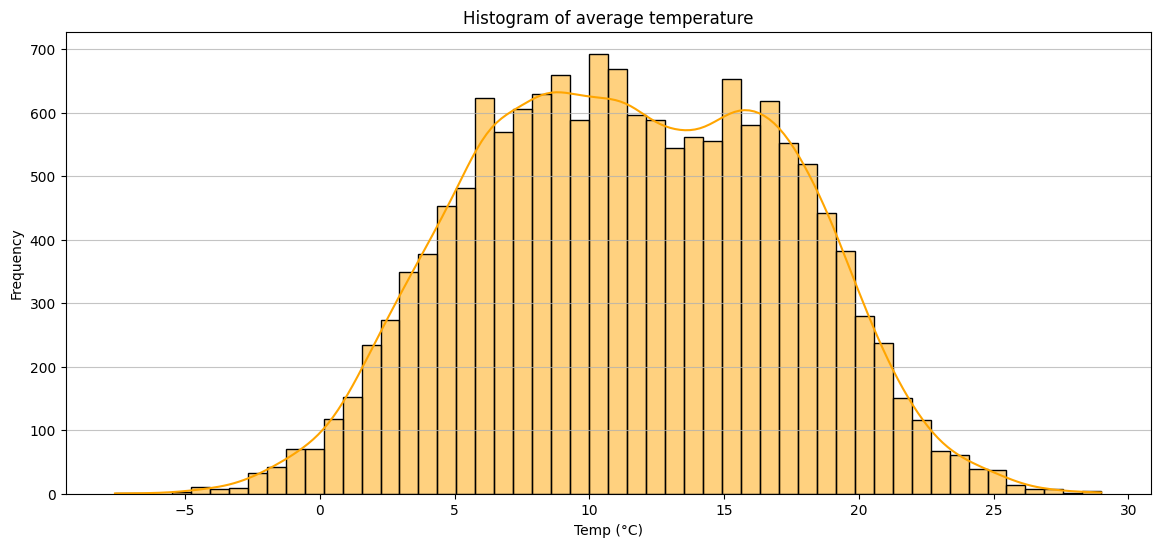

In [7]:
plt.figure(figsize = (14,6))
sns.histplot(df["mean_temp"], color="orange", kde=True) # kde=True để vẽ thêm đường ước lượng mật độ
plt.title("Histogram of average temperature")
plt.xlabel("Temp (°C)")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75) # Thêm lưới ngang để dễ đọc
plt.show() # Hiển thị biểu đồ

Corelation Matrix

<Axes: >

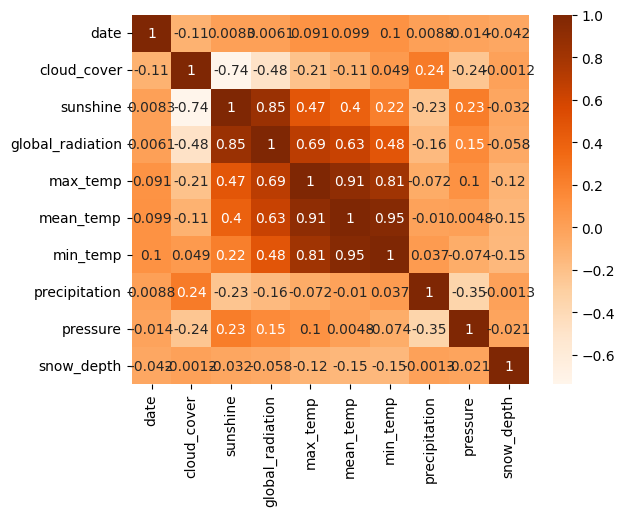

In [9]:
cm = df.corr()
sns.heatmap(cm, annot = True, cmap = 'Oranges')

Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from IPython.display import display

numeric_cols = [
    'cloud_cover', 'sunshine', 'global_radiation',
    'max_temp', 'mean_temp', 'min_temp',
    'precipitation', 'pressure', 'snow_depth'
]

# Khởi tạo scaler (instance, có dấu ())
scaler = MinMaxScaler()

# Fit và transform lên df_filled
scaled_array = scaler.fit_transform(df[numeric_cols])

# Tạo DataFrame mới với dữ liệu đã scale
df_scaled = df.copy()
df_scaled[numeric_cols] = scaled_array

# Tuỳ chỉnh pandas output cho đẹp
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Hiển thị DataFrame đã scale
display(df_scaled.head(10))


date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  min_temp  precipitation  pressure  snow_depth
0 1979-01-01     0.222222   0.43750          0.111675  0.192744   0.095628  0.126100       0.006472  0.670429    0.409091
1 1979-01-02     0.666667   0.10625          0.048223  0.176871   0.136612  0.126100       0.000000  0.741535    0.363636
2 1979-01-03     0.555556   0.00000          0.012690  0.170068   0.131148  0.134897       0.000000  0.687359    0.181818
3 1979-01-04     0.888889   0.00000          0.012690  0.133787   0.136612  0.155425       0.000000  0.550790    0.090909
4 1979-01-05     0.666667   0.12500          0.053299  0.267574   0.185792  0.304985       0.000000  0.709932    0.045455
5 1979-01-06     0.555556   0.23750          0.078680  0.328798   0.193989  0.152493       0.011327  0.769752    0.045455
6 1979-01-07     0.888889   0.00000          0.012690  0.333333   0.248634  0.190616       0.084142  0.740406    0.000000
7 1979-01-08     0.888889   0.00625          0.017766  0.272109   0.396175  0.501466       0.012945  0.667043    0.000000
8 1979-01-09     0.444444   0.36250          0.106599  0.258503   0.308743  0.392962       0.116505  0.588036    0.000000
9 1979-01-10     0.777778   0.11875          0.055838  0.251701   0.297814  0.387097       0.033981  0.309255    0.000000

Create sequences

In [19]:
data_array = df_scaled[numeric_cols].values

# Xác định chỉ số cột target
target_idx = numeric_cols.index('mean_temp')

# Kích thước cửa sổ
window_size = 30

# Hàm tạo sequences
def create_sequences(data, target_idx, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size, target_idx])
    return np.array(X), np.array(y)

# Tạo X_scaled, y_scaled từ df_scaled
X, y = create_sequences(data_array, target_idx, window_size)

print("Shape X:", X.shape)
print("Shape y:", y.shape)

Shape X: (15311, 30, 9)
Shape y: (15311,)


Train - Validation - Test

In [20]:
# Chia train/val/test: 70% - 15% - 15%
n_samples = X.shape[0]
train_end = int(n_samples * 0.7)
val_end = train_end + int(n_samples * 0.15)

X_train, y_train = X[:train_end], y[:train_end]
X_val,   y_val   = X[train_end:val_end], y[train_end:val_end]
X_test,  y_test  = X[val_end:], y[val_end:]

# In kích thước các tập
print("Tổng samples:", n_samples)
print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Tổng samples: 15311
Train: (10717, 30, 9) (10717,)
Validation: (2296, 30, 9) (2296,)
Test: (2298, 30, 9) (2298,)


Build  Model LSTM

In [14]:

# Đặt thông số đầu vào từ dữ liệu
input_shape = X_train.shape[1:]  # (30, 9)

# Xây dựng mô hình LSTM
model = Sequential([
    LSTM(64, input_shape=input_shape, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # đầu ra là giá trị nhiệt độ trung bình
])

# Compile mô hình
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Hiển thị kiến trúc mô hình
model.summary()

C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,057 (82.25 KB)

 Trainable params: 21,057 (82.25 KB)

 Non-trainable params: 0 (0.00 B)

Training

In [15]:
# Huấn luyện mô hình
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_val, y_val),
    verbose=1
)

# Trả về lịch sử huấn luyện
history.history

Epoch 1/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0418 - mae: 0.1326 - val_loss: 0.0037 - val_mae: 0.0484
Epoch 2/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0054 - mae: 0.0584 - val_loss: 0.0037 - val_mae: 0.0492
Epoch 3/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0043 - mae: 0.0525 - val_loss: 0.0030 - val_mae: 0.0447
Epoch 4/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0032 - mae: 0.0450 - val_loss: 0.0016 - val_mae: 0.0314
Epoch 5/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0024 - mae: 0.0386 - val_loss: 0.0017 - val_mae: 0.0334
Epoch 6/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0020 - mae: 0.0354 - val_loss: 0.0011 - val_mae: 0.0255
Epoch 7/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0018 - mae: 0.0330 - val_loss: 0.0020 - val_mae: 0.0374
Epoch 8/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0017 - mae: 0.0319 - val_loss: 0.0014 - val_mae: 0.0311
Epoch 9/20
168/168 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/

{'loss': [0.014969885349273682,
  0.0050509036518633366,
  0.0040804841555655,
  0.003034388180822134,
  0.0023670729715377092,
  0.001978982938453555,
  0.0016924557276070118,
  0.0016087363474071026,
  0.0015628341352567077,
  0.0013884339714422822,
  0.0013362659374251962,
  0.0013132172171026468,
  0.0013057756004855037,
  0.0012431456707417965,
  0.001185704953968525,
  0.0011957173701375723,
  0.0011571034556254745,
  0.0011078733950853348,
  0.0011297620367258787,
  0.0011153669329360127],
 'mae': [0.08266520500183105,
  0.05655789002776146,
  0.05089001730084419,
  0.04368676617741585,
  0.038050178438425064,
  0.034987807273864746,
  0.03203044459223747,
  0.03138648346066475,
  0.03097492642700672,
  0.028980141505599022,
  0.028503229841589928,
  0.028251636773347855,
  0.028165768831968307,
  0.027348875999450684,
  0.026809614151716232,
  0.026874655857682228,
  0.02642628364264965,
  0.02573341503739357,
  0.026204245164990425,
  0.02588132955133915],
 'val_loss': [0.0036

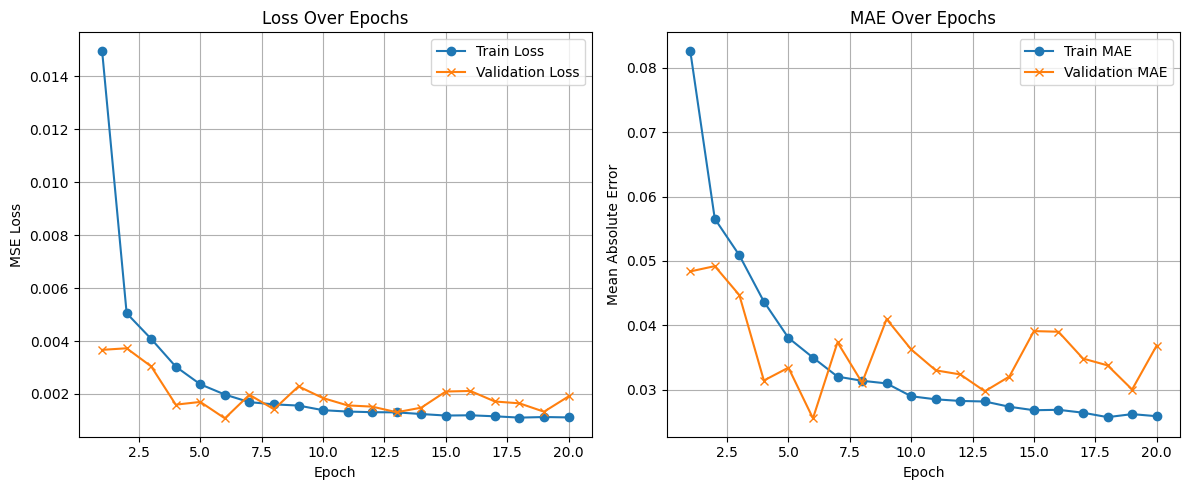

In [16]:
# Trích xuất dữ liệu từ history
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(loss) + 1)

# Vẽ Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Train Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='x')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)

# Vẽ MAE
plt.subplot(1, 2, 2)
plt.plot(epochs, mae, label='Train MAE', marker='o')
plt.plot(epochs, val_mae, label='Validation MAE', marker='x')
plt.title('MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
🔍 Evaluation metrics:
MSE  : 3.072
MAE  : 1.4069
R2   : 0.9021


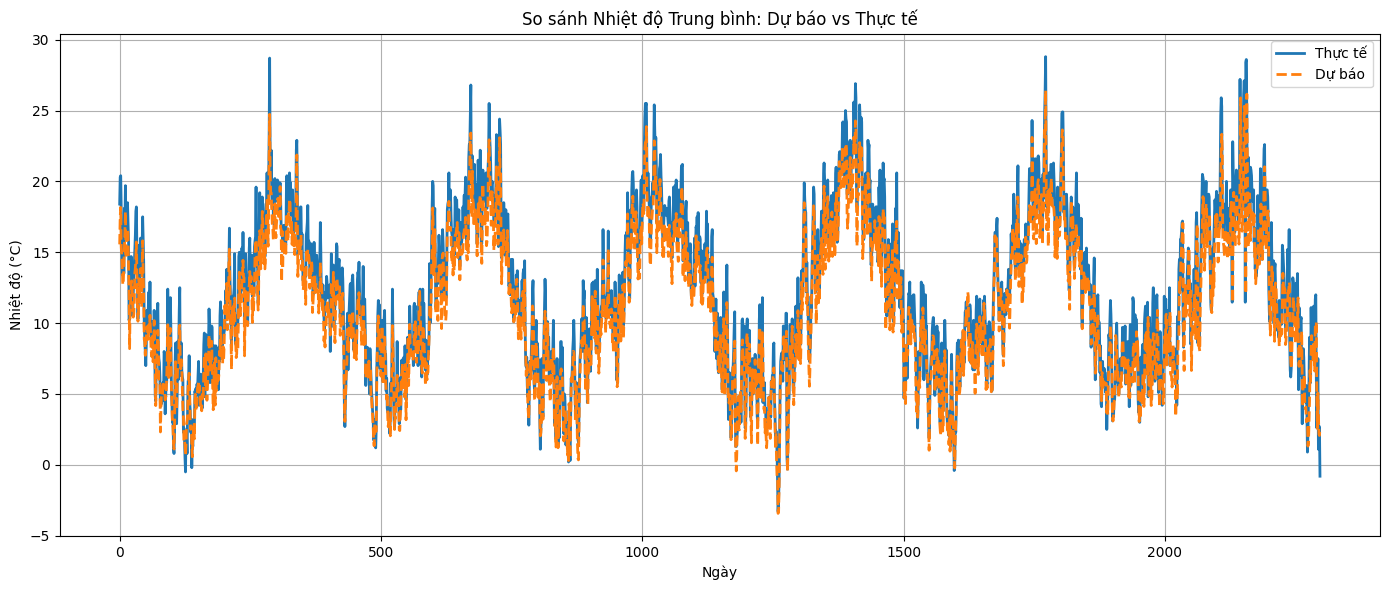

In [17]:
# Dự báo trên tập test
y_pred_scaled = model.predict(X_test)

# Để nghịch chuẩn hóa, ta cần gắn lại các giá trị vào cấu trúc ban đầu
# Lưu ý: 'mean_temp' là cột target, nằm ở vị trí target_idx

# Gắn lại giá trị đã scale với phần còn lại là 0 để inverse_transform
y_pred_full = np.zeros((len(y_pred_scaled), len(numeric_cols)))
y_pred_full[:, target_idx] = y_pred_scaled[:, 0]
y_pred_inv = scaler.inverse_transform(y_pred_full)[:, target_idx]

y_test_full = np.zeros((len(y_test), len(numeric_cols)))
y_test_full[:, target_idx] = y_test
y_test_inv = scaler.inverse_transform(y_test_full)[:, target_idx]

# 🧾 Tính các chỉ số đánh giá
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)

print("🔍 Evaluation metrics:")
print("MSE  :", round(mse, 4))
print("MAE  :", round(mae, 4))
print("R2   :", round(r2, 4))

# 📈 Trực quan hoá kết quả dự báo
plt.figure(figsize=(14,6))
plt.plot(y_test_inv, label='Thực tế', linewidth=2)
plt.plot(y_pred_inv, label='Dự báo', linestyle='--', linewidth=2)
plt.title('So sánh Nhiệt độ Trung bình: Dự báo vs Thực tế')
plt.xlabel('Ngày')
plt.ylabel('Nhiệt độ (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
def safe_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero = y_true != 0
    return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100

mape = safe_mape(y_test_inv, y_pred_inv)
print("MAPE:", round(mape, 2), "%")

MAPE: 14.73 %
